# **STB600 Lab 3: Morphological Image Processing**

## **1. Purpose of the Lab**
The purpose of this lab is to learn how to extract meaningful information from images
using morphological operations. You will apply basic operations such as erosion,
dilation, opening, closing, and hit-or-miss, and then use morphology to locate and measure
a melt pool in an image.

## **2. Learning Outcomes**
After completing this lab, you should be able to:

- Apply basic morphological operations in Python using OpenCV;

- Understand the effect of structuring element shape and size;

- Extract object boundaries using morphology;

- Isolate a melt pool region using a morphological pipeline;

- Measure the melt pool width, height, and centroid.

## **3. Start working Environment**
Before you start, activate your stb600 Python environment as in previous labs.

1. Open the Anaconda PowerShell Prompt.
2. Move to your Lab 3 folder:
3. Activate the environment:

## **4. General Instructions**
During the oral check, you should be able to:

- show the original and processed images,
- explain clearly what each morphological operation does,
- describe why you chose a particular kernel size or shape,
- explain how you isolated the melt pool,
- discuss how you computed width, height, and centroid.

Make sure your code is readable, and always keep your processed images visible.

## **5. Tasks**
This lab contains two main tasks. The first focuses on applying basic morphological
operations to a binary image. The second demonstrates how morphology can be used to
extract meaningful geometric information from an image.

### **5.1. Basic Morphological Operations**
In this task, you will apply standard morphological operations—erosion, dilation, open-
ing, closing, and the hit-or-miss transform—to the image shown in Figure 1. You should
also extract the boundary of the object.

In [1]:
from matplotlib import pyplot as plt
import cv2
def plot(image,title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()
    return

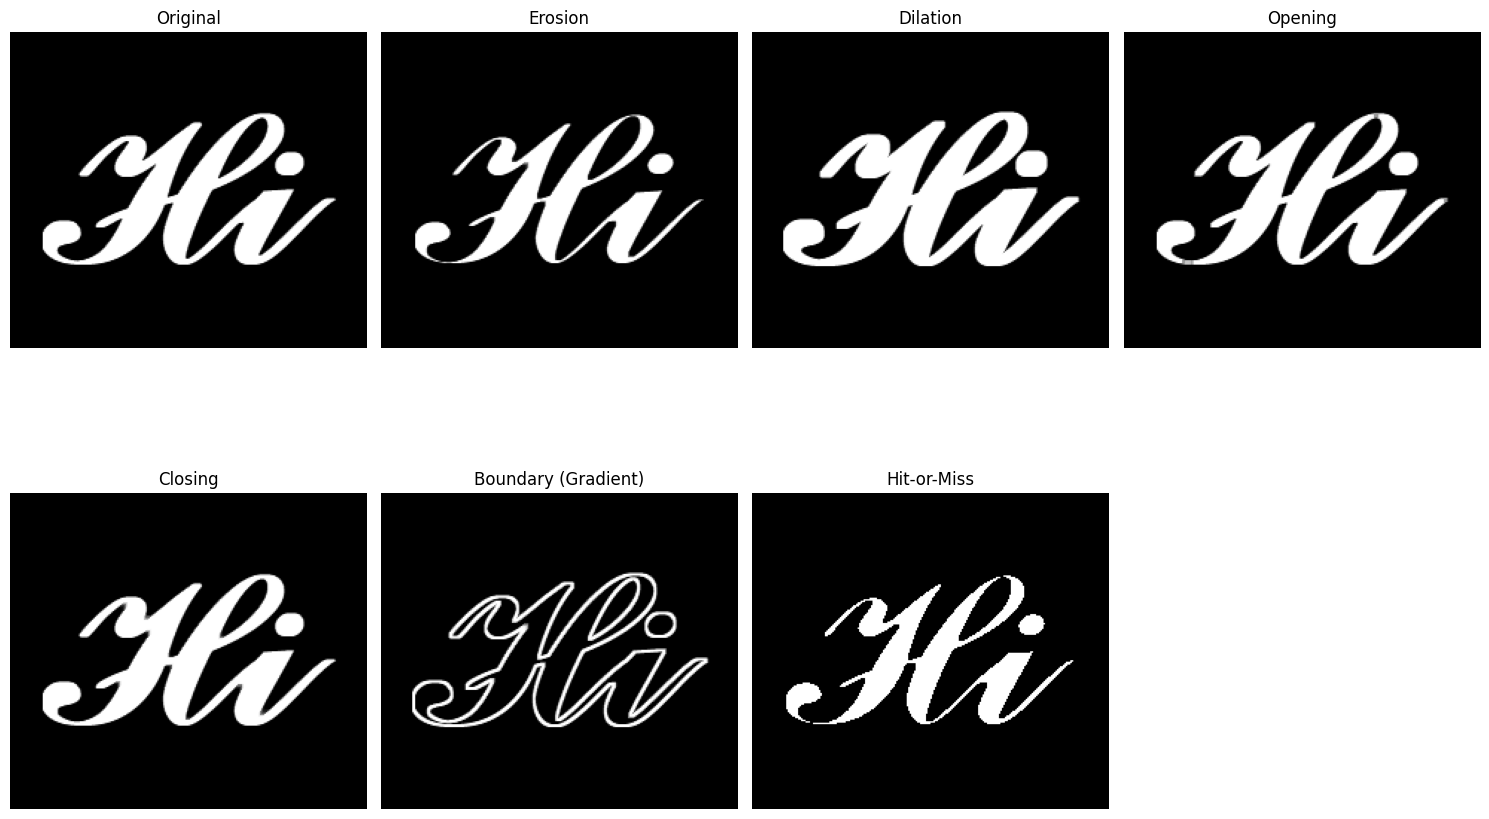

In [2]:
# Read image (binary or grayscale)
img1 = cv2.imread("img1.tif",cv2.IMREAD_GRAYSCALE)

# Create structuring element

# Create structuring element (same for all operations)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# --- Morphological operations ---
img_erosion  = cv2.erode(img1, kernel, iterations=1)
img_dilation = cv2.dilate(img1, kernel, iterations=1)
img_opening  = cv2.morphologyEx(img1, cv2.MORPH_OPEN,  kernel)
img_closing  = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel)

# --- Hit-or-miss requires binary image {0,1} ---
_, img_bin = cv2.threshold(img1, 127, 1, cv2.THRESH_BINARY)
img_hit_or_miss = cv2.morphologyEx(img_bin, cv2.MORPH_HITMISS, kernel)

# --- Boundary extraction (morphological gradient) ---
boundary = cv2.morphologyEx(img1, cv2.MORPH_GRADIENT, kernel)
# Show or save the results
# List of images and titles
images = [
    (img1, "Original"),
    (img_erosion, "Erosion"),
    (img_dilation, "Dilation"),
    (img_opening, "Opening"),
    (img_closing, "Closing"),
    (boundary, "Boundary (Gradient)"),
    (img_hit_or_miss * 255, "Hit-or-Miss")  # scale to 0–255 for display
]

# Create plot grid
plt.figure(figsize=(15, 10))

for i, (img, title) in enumerate(images, 1):
    plt.subplot(2, 4, i)      # 2 rows, 4 columns
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


## **5.2. Object Localization and Size Estimation**
In many computer vision applications, it is necessary to identify an object, determine
its location, and measure its geometric properties. In this task, you will measure the melt
pool width and height, and determine its centroid, using the image shown in Figure 2.

A possible workflow is to extract the melt pool region using morphological operations,
then identify the extreme points (leftmost, rightmost, topmost, bottommost). These can
be used to compute the melt pool width, height, and centroid. You should work on the
original image provided.

1. You may consider thresholding the image , applying suitable

2. Morphological operations to refine the region , and then

3. Using the pixel coordinates of the extracted area to

4. Estimate its size and centroid.

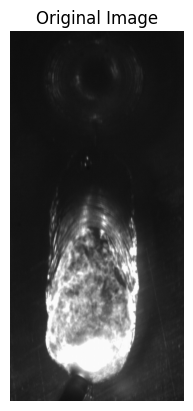

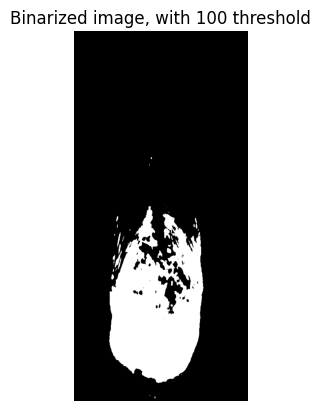

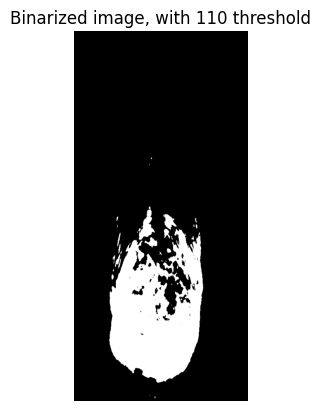

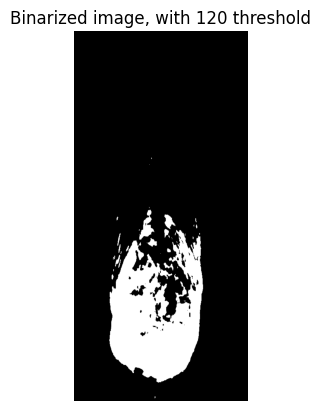

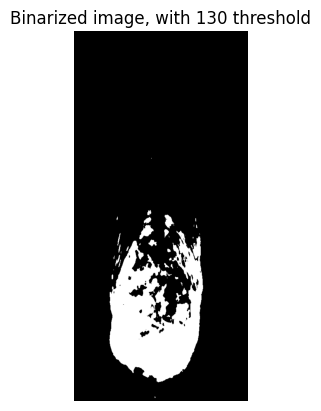

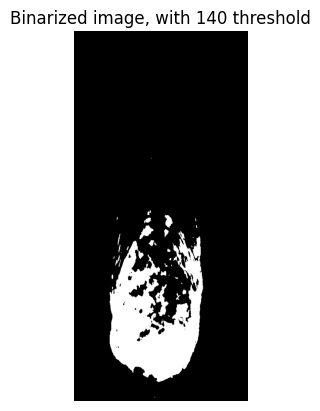

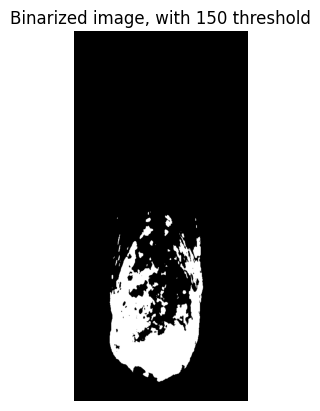

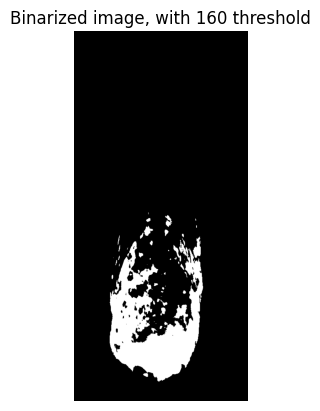

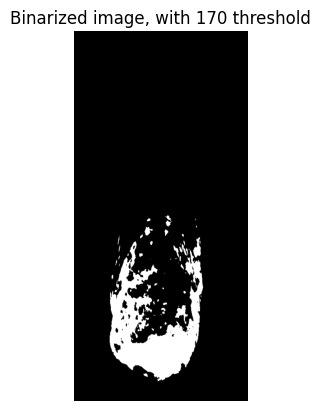

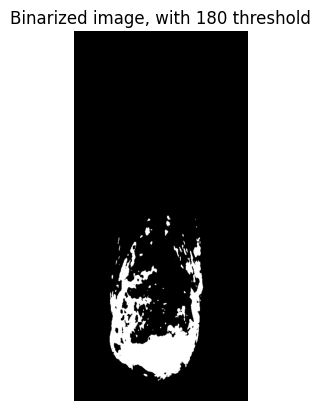

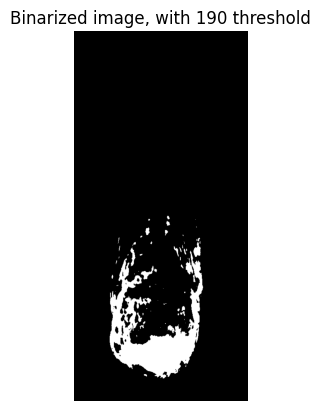

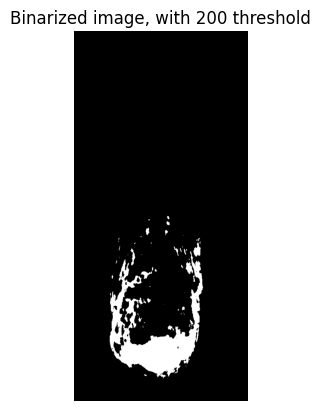

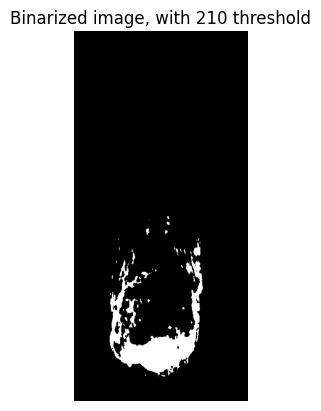

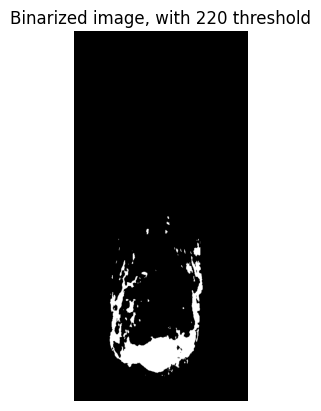

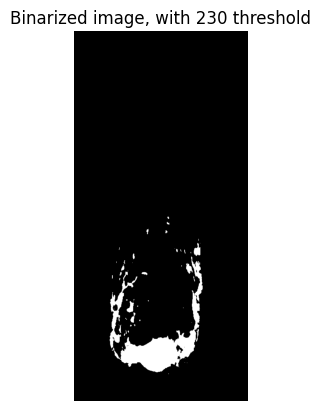

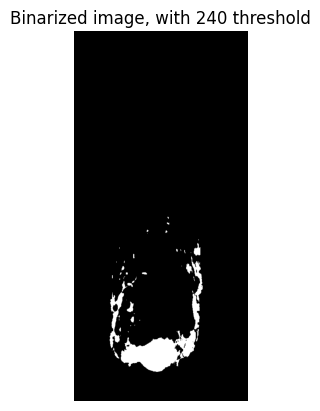

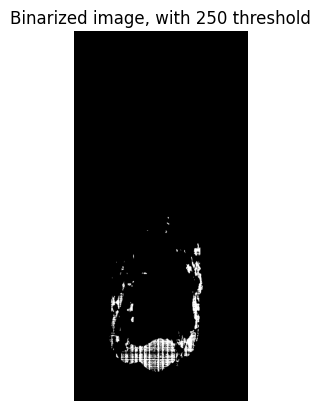

In [3]:
img2 = cv2.imread("img2.tif")

plot(img2,"Original Image")

threshhold = range(100,255,10)

for T in threshhold:
    _, img_binary = cv2.threshold(img2, T, 1, cv2.THRESH_BINARY)
    plot(img_binary*255,f"Binarized image, with {T} threshold")

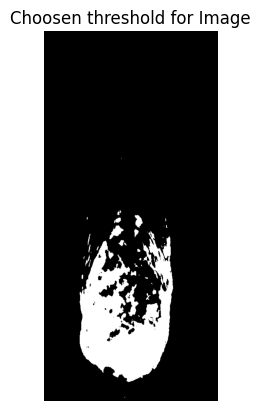

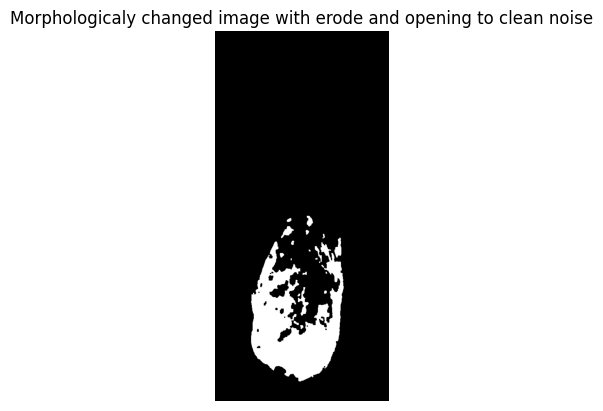

In [4]:
_, img_binary = cv2.threshold(img2, 140, 1, cv2.THRESH_BINARY)
plot(img_binary*255,"Choosen threshold for Image")
img_binary  = cv2.morphologyEx(img_binary, cv2.MORPH_ERODE,  kernel)
img_binary  = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN,  kernel)
plot(img_binary*255,"Morphologicaly changed image with erode and opening to clean noise")

In [ ]:
import numpy as np

ys, xs = np.where(img_binary[:, :, 0] > 0) # Extract the object

# Extremes
x_min = xs.min()
x_max = xs.max()
y_min = ys.min()
y_max = ys.max()

# Coordinates
left   = (x_min,  ys[xs.argmin()])
right  = (x_max,  ys[xs.argmax()])
top    = (xs[ys.argmin()], y_min)
bottom = (xs[ys.argmax()], y_max)

print("Left-most:   ", left)
print("Right-most:  ", right)
print("Top-most:    ", top)
print("Bottom-most: ", bottom)



Left-most:    (np.int64(94), np.int64(705))
Right-most:   (np.int64(334), np.int64(665))
Top-most:     (np.int64(239), np.int64(482))
Bottom-most:  (np.int64(219), np.int64(913))


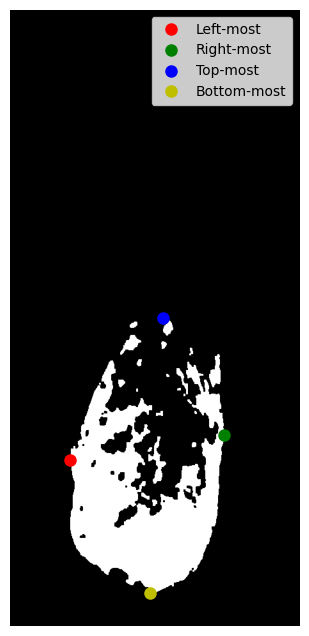

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(img_binary[:, :, 0], cmap="gray")
plt.axis("off")

# Plot points
plt.plot(left[0],   left[1],   'ro', markersize=8, label="Left-most")
plt.plot(right[0],  right[1],  'go', markersize=8, label="Right-most")
plt.plot(top[0],    top[1],    'bo', markersize=8, label="Top-most")
plt.plot(bottom[0], bottom[1], 'yo', markersize=8, label="Bottom-most")

plt.legend()
plt.show()

Centroid: (np.float64(207.314619610172), np.float64(752.2735582939192))


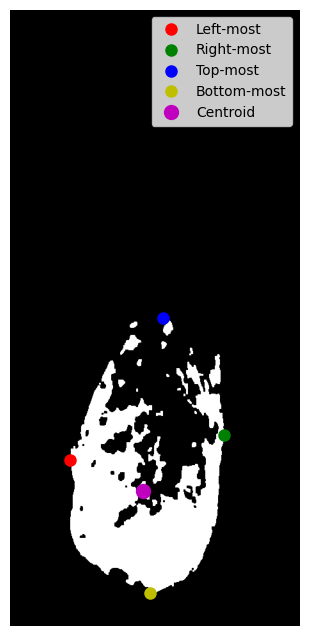

In [7]:
centroid_x = xs.mean()
centroid_y = ys.mean()

centroid = (centroid_x, centroid_y)
print("Centroid:", centroid)

plt.figure(figsize=(8, 8))
plt.imshow(img_binary[:, :, 0], cmap="gray")
plt.axis("off")

# Plot points
plt.plot(left[0],   left[1],   'ro', markersize=8, label="Left-most")
plt.plot(right[0],  right[1],  'go', markersize=8, label="Right-most")
plt.plot(top[0],    top[1],    'bo', markersize=8, label="Top-most")
plt.plot(bottom[0], bottom[1], 'yo', markersize=8, label="Bottom-most")
plt.plot(centroid_x, centroid_y, 'mo', markersize=10, label="Centroid")

plt.legend()
plt.show()


In [8]:
# Count foreground pixels
area = np.count_nonzero(img_binary[:, :, 0])
print("Area (pixels):", area)


Area (pixels): 47149


Bounding box width: 241
Bounding box height: 432


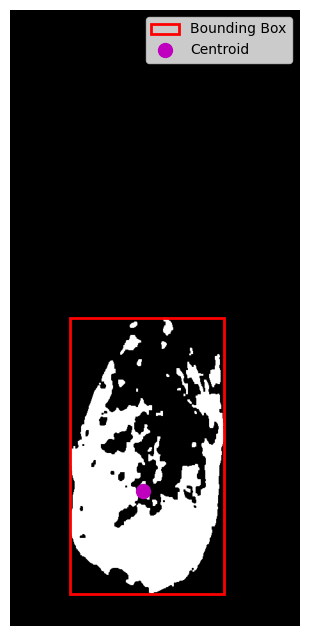

In [9]:
width  = x_max - x_min + 1
height = y_max - y_min + 1

print("Bounding box width:", width)
print("Bounding box height:", height)


plt.figure(figsize=(8, 8))
plt.imshow(img_binary[:, :, 0], cmap='gray')

# Bounding box
plt.gca().add_patch(plt.Rectangle((x_min, y_min), width, height,edgecolor='r', facecolor='none', linewidth=2, label='Bounding Box'))

# Centroid
plt.plot(centroid_x, centroid_y, 'mo', markersize=10, label='Centroid')

plt.legend()
plt.axis('off')
plt.show()



6. What You Must Show During the Check

- All morphological results (erosion, dilation, opening, closing, HMT, boundary).
- Melt pool binary segmentation.
- Bounding box and centroid drawn on the image.
- Ability to explain each step clearly.